In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import os
import requests

In [83]:
urls = ['https://video.udacity-data.com/topher/2018/April/5ac2907f_fuel-econ/fuel-econ.csv',
        'https://video.udacity-data.com/topher/2018/April/5ac2906c_pokemon/pokemon.csv']

In [84]:
for url in urls:
    file_name = url.split('/')[-1]
    resp = requests.get(url)
    if not os.path.exists(file_name):
        with open(os.path.join('./',file_name),mode='wb') as file:
            file.write(resp.content)

In [85]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [86]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [87]:
fuel_econ.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


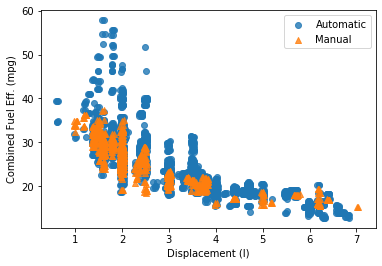

In [88]:
ttype_markers = [['Automatic','o'],
                 ['Manual','^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ[fuel_econ['trans_type'] == ttype]
    sb.regplot(data = plot_data,x = 'displ',y = 'comb',x_jitter = 0.04,fit_reg=False,marker=marker);

plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic','Manual']);

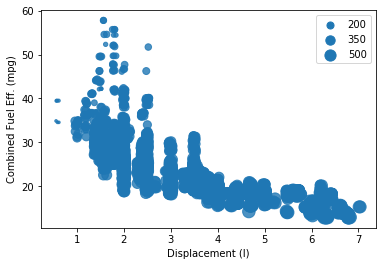

In [95]:
sb.regplot(data=fuel_econ,x='displ',y='comb',x_jitter=0.04,fit_reg=False,
          scatter_kws={'s':fuel_econ['co2']/4});
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

sizes = [200,350,500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/4,color=base_color))
plt.legend(legend_obj,sizes);

In [94]:
legend_obj

# 3. Color Palettes

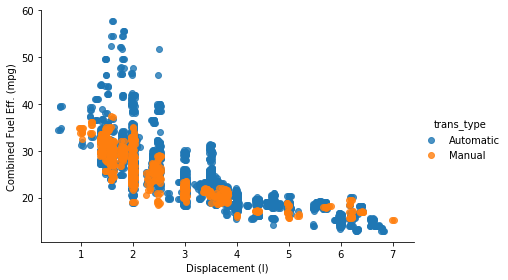

In [98]:
#apply color for a third categorical variable
#size parameter has been renamed to 'height'
g = sb.FacetGrid(data=fuel_econ,hue='trans_type',hue_order = ['Automatic','Manual'],height=4,aspect=1.5)
g = g.map(sb.regplot,'displ','comb',x_jitter=0.04,fit_reg=False);
g.add_legend()
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

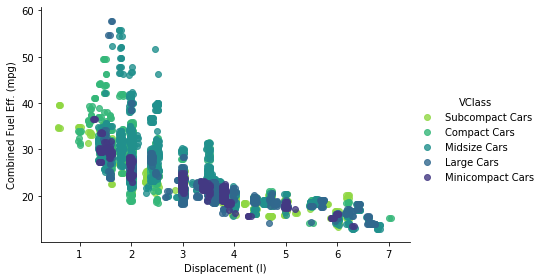

In [106]:
#apply color again for a third categorical variable
g = sb.FacetGrid(data=fuel_econ,hue='VClass',height=4,aspect=1.5,palette='viridis_r')
g = g.map(sb.regplot,'displ','comb',x_jitter=0.04,fit_reg=False);
g.add_legend()
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

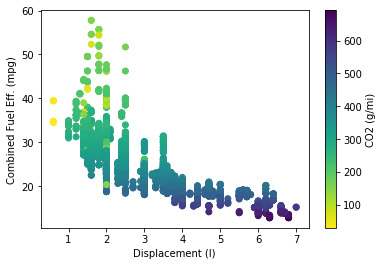

In [107]:
#apply sequential color scheme for third numerical variable
plt.scatter(data=fuel_econ,x='displ',y='comb',c='co2',
            cmap='viridis_r');
plt.colorbar(label='CO2 (g/mi)');
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');